Student Grade Grouping using Clustering


This notebook uses clustering to group student grades from grades_km_input.csv (https://github.com/mlnjsh/DSBDA-Btech/blob/master/grades_km_input.csv)

Step 1: Import libraries and Read csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

df = pd.read_csv("https://raw.githubusercontent.com/mlnjsh/DSBDA-Btech/refs/heads/master/grades_km_input.csv")
X = df.drop('Student',axis=1)

Step 2: Determine the best number of clusters by comparing Average Silhouette Scores

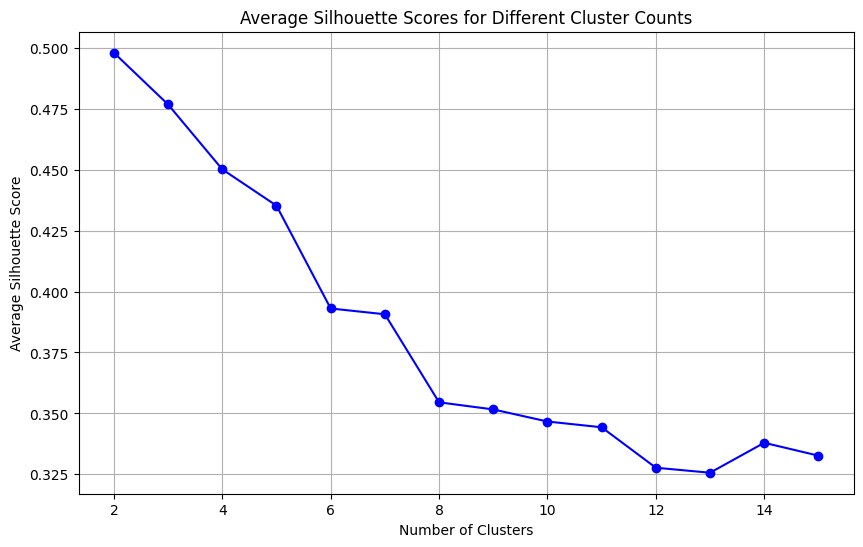

In [2]:
n_numbers = [i for i in range(2,16)]
avg_scores = []
for n_cluster in n_numbers:
    clusterer = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg_scores.append(silhouette_avg)


fig = plt.figure(figsize=(10, 6))
plt.plot(n_numbers, avg_scores, marker='o', linestyle='-', color='b')
plt.title("Average Silhouette Scores for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()
    
        


Based on the average silhouette scores for different numbers of clusters, the best number of clusters appears to be 2, as it yields the highest silhouette score. This indicates that, on average, samples with this number of clusters are well-matched to their own cluster and well-separated from neighboring clusters, making it the most distinct grouping.

Step 3: Use k-means using the chosen number of clusters on features X

In [3]:
kmeans = KMeans(n_clusters = 2, random_state=10)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

Step 4: Use k-means to cluster the dataset and draw conclusions

In [4]:
# save the cluster labels and sort by cluster
clusters = kmeans.predict(X)
X['Cluster'] = clusters
sorted_X = X.sort_values(by='Cluster')
mean_per_cluster = sorted_X.groupby('Cluster').mean()
print("Mean Subject Grades per Cluster:")
mean_per_cluster


Mean Subject Grades per Cluster:


,English,Math,Science
Cluster,,,
0,73.900794,66.011905,67.519841
1,91.426630,86.002717,87.543478


From the results, we see that cluster 0 students can be generalized as a group of poorly performing students. Their mean average for the given subjects, English, Math, and Science are low, within the range of 66-73, which leads us to believe that most students in this cluster have low academic performance.
On the other hand, Cluster 1 can be generalized as a group of high performing students. Their mean average for the given subjects are high, within the range of 86-91, which leads us to believe that most students in this cluster have high academic performance.  
In conclusion, we can see that students in cluster 0 have poor academic performance, while students in cluster 1 have high academic performance, with a significant difference in mean grades for the three subjects between them.